In [14]:
import tensorflow as tf
import numpy as np

In [2]:
n_inputs = 3
n_neurons = 5

In [8]:
tf.reset_default_graph()

In [9]:
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

In [12]:
Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1,n_neurons], dtype=tf.float32))

In [13]:
Y0 = tf.tanh(tf.matmul(X0, Wx) +b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1,Wx)+b)

In [17]:
X0_batch = np.array([[0,1,2],[3,4,5],[6,7,8],[9,0,1]])
X1_batch = np.array([[9,8,7],[0,0,0],[6,5,4],[3,2,1]])

init = tf.global_variables_initializer()


In [18]:
with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0,Y1], feed_dict={X0:X0_batch, X1:X1_batch})
    

In [20]:
print (Y0_val)

[[ 0.8910078  -0.9885529   0.45955032  0.27323604  0.8343172 ]
 [ 0.9998953  -0.99988145 -0.7369279   0.9938573   0.9999449 ]
 [ 0.9999999  -0.9999988  -0.98315465  0.99996686  1.        ]
 [-0.98251593  0.9904305  -0.9999178   0.99994195  0.49901336]]


In [21]:
print (Y1_val)

[[ 1.         -0.9725407  -0.999995    1.          1.        ]
 [ 0.99716276  0.99969333 -0.3703074   0.98419064  0.8090631 ]
 [ 1.          0.9917064  -0.99833083  0.9999994   0.99999976]
 [ 0.8334698  -0.75908124  0.9719944  -0.97287387  0.38409355]]


## static_run() 사용해보기

In [81]:
tf.reset_default_graph()

In [43]:
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])
n_neurons = 5


In [44]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)

In [45]:
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0,X1], dtype=tf.float32)
Y0, Y1 = output_seqs

In [46]:
X0_batch = np.array([[0,1,2],[3,4,5],[6,7,8],[9,0,1]])
X1_batch = np.array([[9,8,7],[0,0,0],[6,5,4],[3,2,1]])

In [47]:
init = tf.global_variables_initializer()
print (Y0, Y1)

Tensor("rnn/basic_rnn_cell/Tanh:0", shape=(?, 5), dtype=float32) Tensor("rnn/basic_rnn_cell/Tanh_1:0", shape=(?, 5), dtype=float32)


In [53]:
with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0:X0_batch, X1:X1_batch})
    print (states.eval(feed_dict={X0:X0_batch, X1:X1_batch}))

[[-0.7289934   0.99954754 -0.9539271  -0.9702462  -0.64289844]
 [-0.75630665 -0.05146711  0.71552664 -0.5181595   0.41110557]
 [-0.6686063   0.9987138  -0.13011807 -0.9271558  -0.35449052]
 [ 0.57779646  0.96259993 -0.6222822   0.84507054 -0.8208067 ]]


In [54]:
print (Y0_val)
print (Y1_val)

[[ 0.01855774 -0.7089068  -0.31897128 -0.84843844 -0.17564279]
 [ 0.06038771  0.36906338 -0.81974787 -0.9799339  -0.5776671 ]
 [ 0.10200659  0.93017143 -0.96270394 -0.99749774 -0.81455725]
 [-0.99227166  0.9999565  -0.5458697   0.9506582   0.88936394]]
[[-0.7289934   0.99954754 -0.9539271  -0.9702462  -0.64289844]
 [-0.75630665 -0.05146711  0.71552664 -0.5181595   0.41110557]
 [-0.6686063   0.9987138  -0.13011807 -0.9271558  -0.35449052]
 [ 0.57779646  0.96259993 -0.6222822   0.84507054 -0.8208067 ]]


In [82]:
X_batch = np.array([[[0,1,2],[9,8,7]],[[3,4,5],[0,0,0]],[[6,7,8],[6,5,4]],[[9,0,1],[3,2,1]]])

In [83]:
X_seqs = tf.unstack(tf.transpose(X_batch, perm=[1,0,2]))
Y_seqs = tf.unstack(tf.transpose(X_seqs, perm=[1,0,2]))


In [84]:
print (X_seqs)

[<tf.Tensor 'unstack:0' shape=(4, 3) dtype=int64>, <tf.Tensor 'unstack:1' shape=(4, 3) dtype=int64>]


In [87]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    a, b = sess.run([X_seqs, Y_seqs])

In [88]:
print (b)

[array([[0, 1, 2],
       [9, 8, 7]]), array([[3, 4, 5],
       [0, 0, 0]]), array([[6, 7, 8],
       [6, 5, 4]]), array([[9, 0, 1],
       [3, 2, 1]])]


## dynamic_run() 해보기

### tranpose, unstack, stack을 사용할 필요가 없다!

In [125]:
tf.reset_default_graph()

In [126]:
n_steps = 2
n_inputs = 3
n_neurons = 5
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
seq_length = tf.placeholder(tf.int32, [None])

In [128]:
X_batch2 = np.array([[[0,1,2],[9,8,7]],[[3,4,5],[0,0,0]],[[6,7,8],[6,5,4]],[[9,0,1],[3,2,1]]])
seq_length_batch = np.array([2,1,2,2])

In [129]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [130]:
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=seq_length)

In [131]:
init = tf.global_variables_initializer()

In [133]:
with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([outputs, states], feed_dict={X:X_batch, seq_length: seq_length_batch})


In [134]:
print (Y0_val)

[[[ 0.67132187 -0.37095284  0.09636954  0.82478195  0.77513784]
  [ 0.9999799  -0.9999988   0.03763447  1.         -0.9490912 ]]

 [[ 0.99412936 -0.99121004  0.25335354  0.999805    0.5588877 ]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.9999119  -0.99991506  0.39803922  0.9999998   0.22541673]
  [ 0.9975212  -0.9999273   0.59371746  0.9998335  -0.9827422 ]]

 [[-0.11396885 -0.9823925   0.9880125   0.9995934  -0.99979264]
  [ 0.77705324 -0.9949735   0.5951807   0.960326   -0.9845893 ]]]


In [135]:
print (Y1_val)

[[ 0.9999799  -0.9999988   0.03763447  1.         -0.9490912 ]
 [ 0.99412936 -0.99121004  0.25335354  0.999805    0.5588877 ]
 [ 0.9975212  -0.9999273   0.59371746  0.9998335  -0.9827422 ]
 [ 0.77705324 -0.9949735   0.5951807   0.960326   -0.9845893 ]]


## RNN 훈련해보기

### MNIST 짜보기

In [201]:
tf.reset_default_graph()

In [202]:
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs_ch14"
logdir = "{}/run-{}/".format(root_logdir, now)

In [203]:
## parameter summary
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

In [204]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
Y = tf.placeholder(tf.int32, [None])
training = tf.placeholder_with_default(False, shape=(), name="training")

In [205]:
with tf.variable_scope("RNN", initializer=tf.contrib.layers.variance_scaling_initializer()):
    basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
    basic_cell_dropout = tf.contrib.rnn.DropoutWrapper(basic_cell, 0.5, training) # 드롭아웃레퍼로 감싼부분
    outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)
    logits = tf.layers.dense(states, n_outputs)

In [206]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist=input_data.read_data_sets("MNIST")

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [207]:
mnist_train_images_reduced = mnist.train.images
mnist_train_labels_reduced = mnist.train.labels
mnist_valid_images_reduced = mnist.validation.images
mnist_valid_labels_reduced = mnist.validation.labels

In [208]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=logits)
    loss = tf.reduce_mean(xentropy)

In [209]:
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [210]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [211]:
init = tf.global_variables_initializer()

In [212]:
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
Y_test = mnist.test.labels

In [214]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist_train_images_reduced.shape[0] // batch_size):
            X_batch , Y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X:X_batch, Y:Y_batch, training:True})
        acc_train = accuracy.eval(feed_dict={X:X_batch, Y:Y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, Y:Y_test})
        print (epoch, "acc train: ", acc_train, "acc test", acc_test)

0 acc train:  0.92 acc test 0.9088
1 acc train:  0.97333336 acc test 0.9543
2 acc train:  0.96 acc test 0.95
3 acc train:  0.96 acc test 0.9545
4 acc train:  0.96 acc test 0.9685
5 acc train:  0.98 acc test 0.9659
6 acc train:  0.98 acc test 0.9685
7 acc train:  0.98 acc test 0.9697
8 acc train:  0.9866667 acc test 0.9663
9 acc train:  0.96666664 acc test 0.9689
10 acc train:  0.99333334 acc test 0.9644
11 acc train:  0.9866667 acc test 0.9727
12 acc train:  0.9866667 acc test 0.9741
13 acc train:  0.98 acc test 0.9666
14 acc train:  0.98 acc test 0.9723
15 acc train:  0.99333334 acc test 0.9657
16 acc train:  0.98 acc test 0.9722
17 acc train:  0.9866667 acc test 0.9661
18 acc train:  0.98 acc test 0.9741
19 acc train:  0.98 acc test 0.9733
20 acc train:  0.98 acc test 0.9738
21 acc train:  0.98 acc test 0.9766
22 acc train:  0.99333334 acc test 0.9728
23 acc train:  0.9866667 acc test 0.9741
24 acc train:  0.9866667 acc test 0.9758
25 acc train:  0.99333334 acc test 0.973
26 acc trai

## 시계열 예측을 위해 훈련해보기

In [1]:
import tensorflow as tf

/Users/woohyunhan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np

In [58]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

n_layers = 3

In [75]:
tf.reset_default_graph()

In [76]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
Y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [77]:
#with tf.variable_scope("RNN", initializer=tf.contrib.layers.variance_scaling_initializer()):
#    cell =  tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
#    rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
#    stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
#    stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
#    outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [78]:
#with tf.variable_scope("RNN", initializer=tf.contrib.layers.variance_scaling_initializer()):
#    cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu), output_size=n_outputs)
#    outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [79]:
with tf.variable_scope("RNN", initializer=tf.contrib.layers.variance_scaling_initializer()):
    layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu) for layer in range(n_layers)]
    multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
    multi_layer_cell_wrap = tf.contrib.rnn.OutputProjectionWrapper(multi_layer_cell, output_size=n_outputs)
    outputs, states = tf.nn.dynamic_rnn(multi_layer_cell_wrap, X, dtype=tf.float32)


In [80]:
learning_rate = 0.01

loss = tf.reduce_mean(tf.square(outputs-Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [81]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [82]:
# 랜덤한 시계열 데이터를 만들어야함.
n_sample = 400
n_timestep = 1000
n_length = n_steps
time = np.linspace(0,30,n_timestep)
value_time = time*np.sin(time) /3.0 + 2.0*np.sin(5*time)
time_random_choice_index = np.sort(np.random.choice(np.arange(n_timestep-n_length-1), n_sample)) # 왜 n_timestep - n_sample -1 을 했을까?
#print (np.sort(time_random_choice_index)) 
#print (np.arange(n_timestep-n_sample))

In [83]:
%matplotlib inline

In [84]:
import matplotlib.pyplot as plt

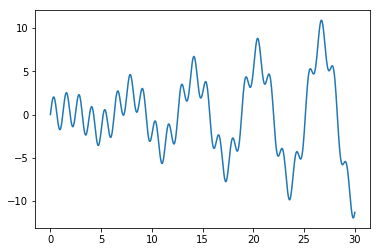

In [85]:
plt.plot(time, value_time)

In [86]:
X_train = []
Y_train = []
for i in range(n_sample):
    index = time_random_choice_index[i]
    random_chosen_time = time[index: index+n_length]
    one_step_forward = time[index+1: index+1+n_length]
    #X_train.append(random_chosen_time.reshape(-1,1)) # 이거 아님
    value_original = random_chosen_time*np.sin(random_chosen_time) /3.0 + 2.0*np.sin(5*random_chosen_time)
    value = one_step_forward*np.sin(one_step_forward) /3.0 + 2.0*np.sin(5*one_step_forward)
    X_train.append(value_original.reshape(-1,1))
    Y_train.append(value.reshape(-1,1))
X_train = np.array(X_train)
Y_train = np.array(Y_train)

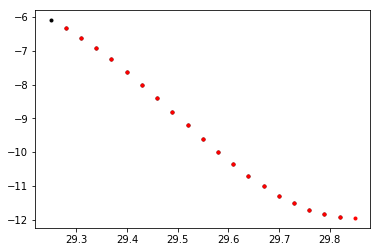

In [87]:
plt.plot(random_chosen_time, value_original, 'k.')
plt.plot(one_step_forward, value, 'r.')

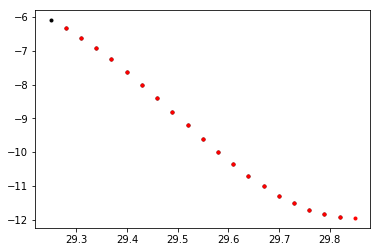

In [88]:
plt.plot(random_chosen_time, value_original, 'k.')
plt.plot(one_step_forward, Y_train[n_sample-1].reshape(-1), 'r.')

In [89]:
n_iterations = 1500
batch_size = 50
n_batches = X_train.shape[0] // batch_size
print (n_batches)

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        shuffled_idx = np.random.permutation(X_train.shape[0])
        X_batches = np.array_split(X_train[shuffled_idx], n_batches)
        Y_batches = np.array_split(Y_train[shuffled_idx], n_batches)
        for X_batch, Y_batch in zip(X_batches, Y_batches):
            sess.run(training_op, feed_dict={X:X_batch, Y:Y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X:X_batch, Y:Y_batch})
            print (iteration, "\t MSE", mse)
    save_path = saver.save(sess, "./Ch14_RNN_test_final.ckpt")

8
0 	 MSE 1.5316701
100 	 MSE 0.0028756198
200 	 MSE 0.0042377864
300 	 MSE 0.0039476245
400 	 MSE 0.004565317
500 	 MSE 0.0032812962
600 	 MSE 0.004556116
700 	 MSE 0.0030035835
800 	 MSE 0.14869058
900 	 MSE 0.0035463383
1000 	 MSE 0.036079224
1100 	 MSE 0.0038051442
1200 	 MSE 0.0026999197
1300 	 MSE 0.004214524
1400 	 MSE 0.0036199586


In [90]:
#훈련된거 예측해보기
with tf.Session() as sess:
    saver.restore(sess, "./Ch14_RNN_test_final.ckpt")
    rnd_index = np.random.choice(np.arange(n_timestep-n_length-1), 1)[0]
    #print (rnd_index)
    X_new = np.array(time[rnd_index: rnd_index+n_length])
    Y_new = X_new*np.sin(X_new) /3.0 + 2.0*np.sin(5*X_new)
    X_batch = np.array([Y_new.reshape(-1,1)])
    X_new_plus = np.array(time[rnd_index+1: rnd_index+1+n_length])
    Y_new_plus = X_new_plus*np.sin(X_new_plus) /3.0 + 2.0*np.sin(5*X_new_plus)
    Y_pred = sess.run(outputs, feed_dict={X: X_batch})
    Y_pred_new = Y_pred[0].reshape(-1)
    print (X_new)
    print (Y_new_plus)
    print (Y_pred_new)

INFO:tensorflow:Restoring parameters from ./Ch14_RNN_test_final.ckpt
[21.23123123 21.26126126 21.29129129 21.32132132 21.35135135 21.38138138
 21.41141141 21.44144144 21.47147147 21.5015015  21.53153153 21.56156156
 21.59159159 21.62162162 21.65165165 21.68168168 21.71171171 21.74174174
 21.77177177 21.8018018 ]
[3.75297923 3.87107094 4.00033783 4.13442832 4.26678658 4.39080301
 4.49996604 4.58801176 4.64906812 4.67779038 4.66948476 4.62021753
 4.52690713 4.38739705 4.20050811 3.96606874 3.68492267 3.35891379
 2.99084866 2.58443728]
[3.5784936 3.8300536 4.00266   4.1256967 4.254479  4.385323  4.4880266
 4.5769906 4.6447086 4.6761117 4.6674433 4.619376  4.5256968 4.3814597
 4.195013  3.9620075 3.6828425 3.3592434 2.994313  2.5909505]


(-10, 10)

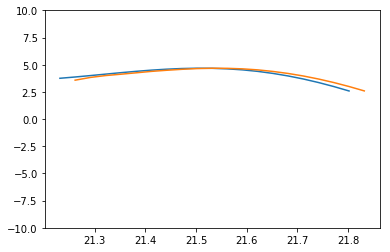

In [91]:
plt.plot(X_new, Y_new_plus)
plt.plot(X_new_plus, Y_pred_new)
plt.ylim([-10,10])

## 창조적인 RNN만들기

In [92]:
#훈련된거 예측해보기
sequence = [0.] * n_steps
with tf.Session() as sess:
    saver.restore(sess, "./Ch14_RNN_test_final.ckpt")
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0,-1,0])

INFO:tensorflow:Restoring parameters from ./Ch14_RNN_test_final.ckpt


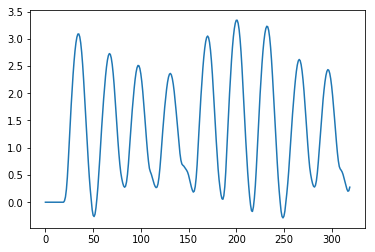

In [93]:
plt.plot(np.arange(len(sequence)), sequence)